In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import BayesianGaussianMixture


from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
class BayesClassifier:
    
    def fit(self, X, Y):
    # assume classes are numbered 0...K-1
        self.K = len(set(Y))

        self.gaussians = []
        self.p_y = np.zeros(self.K)
        for k in range(self.K):
            print("Fitting gmm", k)
            Xk = X[Y == k]
            self.p_y[k] = len(Xk)
            gmm = BayesianGaussianMixture(10)
            gmm.fit(Xk)
            self.gaussians.append(gmm)
    # normalize p(y)
        self.p_y /= self.p_y.sum()

    def sample_given_y(self, y):
        gmm = self.gaussians[y]
        sample = gmm.sample()
        # note: sample returns a tuple containing 2 things:
        # 1) the sample
        # 2) which cluster it came from
        # we'll use (2) to obtain the means so we can plot
        # them like we did in the previous script
        # we cheat by looking at "non-public" params in
        # the sklearn source code
        mean = gmm.means_[sample[1]]
        return sample[0].reshape(28, 28), mean.reshape(28, 28)

    def sample(self):
        y = np.random.choice(self.K, p=self.p_y)
        return self.sample_given_y(y)

Fitting gmm 0
Fitting gmm 1
Fitting gmm 2
Fitting gmm 3
Fitting gmm 4
Fitting gmm 5
Fitting gmm 6
Fitting gmm 7
Fitting gmm 8
Fitting gmm 9


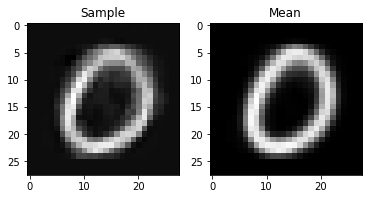

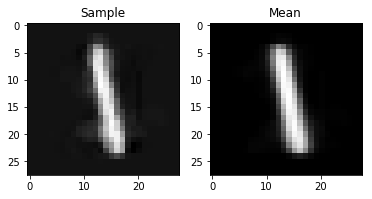

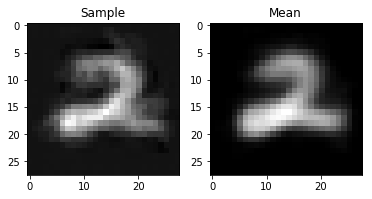

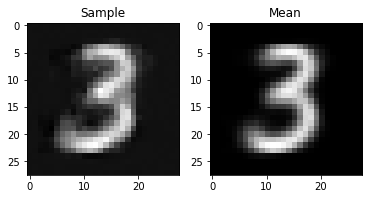

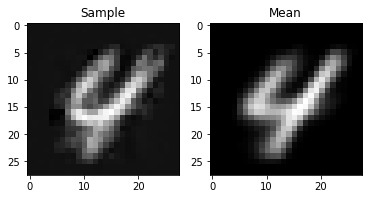

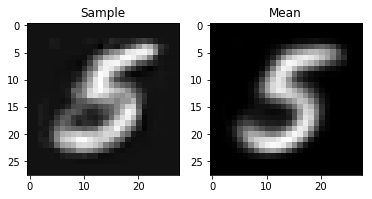

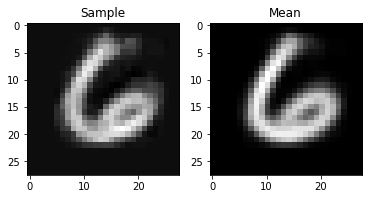

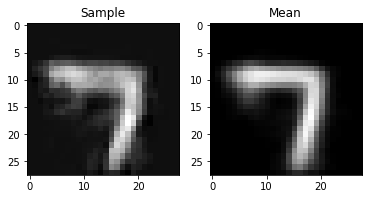

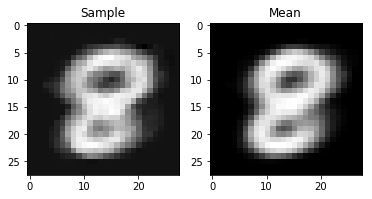

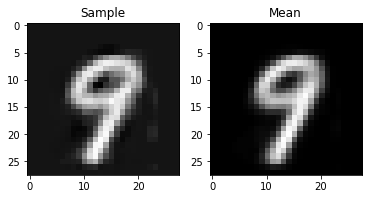

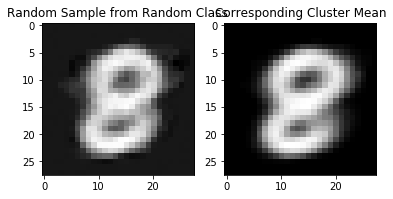

In [6]:
if __name__=='__main__':
    
    X_train = mnist.train.images
    Y_train = mnist.train.labels
    
    X_test = mnist.test.images
    Y_test = mnist.test.labels

    clf = BayesClassifier()
    clf.fit(X_test, Y_test)

    for k in range(clf.K):
    # show one sample for each class
    # also show the mean image learned

        sample, mean = clf.sample_given_y(k)

        plt.subplot(1,2,1)
        plt.imshow(sample, cmap='gray')
        plt.title("Sample")
        plt.subplot(1,2,2)
        plt.imshow(mean, cmap='gray')
        plt.title("Mean")
        plt.show()

  # generate a random sample
    sample, mean = clf.sample()
    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title("Random Sample from Random Class")
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title("Corresponding Cluster Mean")
    plt.show()  